In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import math
import tensorflow as tf
import numpy as np
from numpy import unique
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, TensorBoard

In [2]:
data = pd.read_csv(r"C:\Users\49173\Desktop\Data\stockxf2.csv")
df = data.copy()

In [3]:
df

,productId,orderDate,salePrice,shoeSize,brand,sneakerName,colorway,retailPrice,releaseDate,salesThisPeriod,hype,days,collaboration
0,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,300,9.5,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
1,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,300,9.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
2,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,382,10.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
3,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,304,8.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
4,55a9ccfe-129a-438a-9989-b877c2a66279,2022-05-26,390,12.0,Jordan,Jordan 4 Retro Military Black,White/Black-Neutral Grey,210,2022-05-21,2476,10743,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192880,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,384,10.0,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1
192881,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,366,12.0,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1
192882,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,420,10.5,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1
192883,3774e829-99f4-46d6-bb94-f9e19ad55ad3,2022-03-18,357,11.0,adidas,adidas Yeezy Boost 350 V2 Sesame,Sesame/Sesame/Sesame,220,2018-11-23,13,5366,1211,1


In [4]:
df['log_hype'] = np.log(df['hype']+1)
df['log_resalePrice'] = np.log(df['salePrice'])
# df['retailPrice'] = np.log(df['retailPrice'])

In [5]:
df = df.drop(['productId', 
              'orderDate',
              #'sneakerName',
              #'retailPrice',
              'colorway', 
              'releaseDate', 
              "hype", 
              'salePrice'],
              axis = 1)

In [6]:
df

,shoeSize,brand,sneakerName,retailPrice,salesThisPeriod,days,collaboration,log_hype,log_resalePrice
0,9.5,Jordan,Jordan 4 Retro Military Black,210,2476,5,1,9.282103,5.703782
1,9.0,Jordan,Jordan 4 Retro Military Black,210,2476,5,1,9.282103,5.703782
2,10.0,Jordan,Jordan 4 Retro Military Black,210,2476,5,1,9.282103,5.945421
3,8.0,Jordan,Jordan 4 Retro Military Black,210,2476,5,1,9.282103,5.717028
4,12.0,Jordan,Jordan 4 Retro Military Black,210,2476,5,1,9.282103,5.966147
...,...,...,...,...,...,...,...,...,...
192880,10.0,adidas,adidas Yeezy Boost 350 V2 Sesame,220,13,1211,1,8.588024,5.950643
192881,12.0,adidas,adidas Yeezy Boost 350 V2 Sesame,220,13,1211,1,8.588024,5.902633
192882,10.5,adidas,adidas Yeezy Boost 350 V2 Sesame,220,13,1211,1,8.588024,6.040255
192883,11.0,adidas,adidas Yeezy Boost 350 V2 Sesame,220,13,1211,1,8.588024,5.877736


In [7]:
df2 = pd.get_dummies(df["brand"], prefix='brand', drop_first=True)

In [8]:
df = df.drop(['brand'], axis = 1)

In [9]:
df3 = pd.get_dummies(df["sneakerName"], prefix='SN', drop_first=True)

In [10]:
df = df.drop(['sneakerName'], axis = 1)

In [11]:
df

,shoeSize,retailPrice,salesThisPeriod,days,collaboration,log_hype,log_resalePrice
0,9.5,210,2476,5,1,9.282103,5.703782
1,9.0,210,2476,5,1,9.282103,5.703782
2,10.0,210,2476,5,1,9.282103,5.945421
3,8.0,210,2476,5,1,9.282103,5.717028
4,12.0,210,2476,5,1,9.282103,5.966147
...,...,...,...,...,...,...,...
192880,10.0,220,13,1211,1,8.588024,5.950643
192881,12.0,220,13,1211,1,8.588024,5.902633
192882,10.5,220,13,1211,1,8.588024,6.040255
192883,11.0,220,13,1211,1,8.588024,5.877736


In [12]:
df = df.join(df2)

In [13]:
df = df.join(df3)

In [14]:
df

,shoeSize,retailPrice,salesThisPeriod,days,collaboration,log_hype,log_resalePrice,brand_BAPE,brand_Common Projects,brand_Converse,...,SN_adidas Yeezy Slide Glow Green,SN_adidas Yeezy Slide Glow Green (2022) (Restock),SN_adidas Yeezy Slide Ochre,SN_adidas Yeezy Slide Onyx,SN_adidas Yeezy Slide Pure (First Release),SN_adidas Yeezy Slide Pure (Restock Pair),SN_adidas Yeezy Slide Resin,SN_adidas Yeezy Slide Soot,SN_adidas ZX 8000 LEGO,SN_adidas ZX 8000 Sean Wotherspoon Superearth
0,9.5,210,2476,5,1,9.282103,5.703782,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.0,210,2476,5,1,9.282103,5.703782,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,210,2476,5,1,9.282103,5.945421,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,210,2476,5,1,9.282103,5.717028,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.0,210,2476,5,1,9.282103,5.966147,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192880,10.0,220,13,1211,1,8.588024,5.950643,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192881,12.0,220,13,1211,1,8.588024,5.902633,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192882,10.5,220,13,1211,1,8.588024,6.040255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192883,11.0,220,13,1211,1,8.588024,5.877736,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dfnames = df.copy()
dfnames = dfnames.drop(['log_resalePrice'], axis = 1)

columns = dfnames.columns.tolist()
columns.insert(0, 'constant')
print(columns)

['constant', 'shoeSize', 'retailPrice', 'salesThisPeriod', 'days', 'collaboration', 'log_hype', 'brand_BAPE', 'brand_Common Projects', 'brand_Converse', 'brand_Crocs', 'brand_Jordan', 'brand_MSCHF', 'brand_New Balance', 'brand_Nike', 'brand_Puma', 'brand_Reebok', 'brand_Salomon', 'brand_Under Armour', 'brand_Vans', 'brand_adidas', 'SN_Alexander McQueen Oversized Ivory Black', 'SN_Common Projects Original Achilles White', 'SN_Converse Chuck Taylor All-Star Hi Platform White Black (W)', 'SN_Converse Run Star Hike Hi Black White Gum', 'SN_Crocs All-Terrain Clog Carrots', 'SN_Crocs Classic Clog Cinnamon Toast Crunch', 'SN_Crocs Classic Clog Cinnamon Toast Crunch (GS)', 'SN_Crocs Classic Clog Karol G', 'SN_Crocs Classic Clog Lucky Charms Magically Delicious', 'SN_Crocs Classic Clog Staple Sidewalk Luxe', 'SN_Crocs Pollex Clog by Salehe Bembury Crocodile', 'SN_Crocs Pollex Clog by Salehe Bembury Stratus', 'SN_Crocs Pollex Clog by Salehe Bembury Urchin', 'SN_Jordan 1 Elevate Low Onyx (W)', 'S

In [16]:
X = df.drop('log_resalePrice',axis =1).values
y = df['log_resalePrice'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

C:\Users\49173\AppData\Local\Temp\ipykernel_11964\2855883272.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\49173\AppData\Local\Temp\ipykernel_11964\2855883272.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [18]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 10)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=10)

In [19]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

MAE: 0.08199498925266886
MSE: 0.014145548851679922
RMSE: 0.11893506149020953
VarScore: 0.9377945016931005


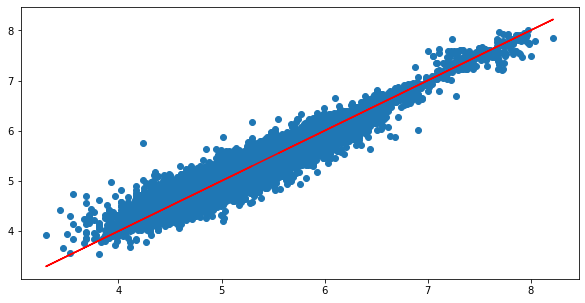

In [20]:
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')